[Elman网络原帖](https://blog.csdn.net/fengzhimohan/article/details/80847979)

一、基础概念：

Elman神经网络是一种典型的动态递归神经网络，它是在BP网络基本结构的基础上，在隐含层增加一个承接层，作为一步延时算子，达到记忆的目的，从而使系统具有适应时变特性的能力，增强了网络的全局稳定性，它比前馈型神经网络具有更强的计算能力，还可以用来解决快速寻优问题。

二、与经典BP区别与联系

它是动态反馈型网络，它能够内部反馈、存储和利用过去时刻输出信息，既可以实现静态系统的建模，还能实现动态系统的映射并直接反应系统的动态特性，在计算能力及网络稳定性方面都比BP神经网络更胜一筹。

与BP神经网络一样，算法都是采用基于梯度下降法，会出现训练速度慢和容易陷入局部极小点的缺点，对神经网络的训练较难达到全局最优。

Elman神经网络是应用较为广泛的一种典型的反馈型神经网络模型。一般分为四层：输入层、隐层、承接层和输出层。其输入层、隐层和输出层的连接类似于前馈网络。输入层的单元仅起到信号传输作用，输出层单元起到加权作用。隐层单元有线性和非线性两类激励函数，通常激励函数取Signmoid非线性函数。而承接层则用来记忆隐层单元前一时刻的输出值，可以认为是一个有一步迟延的延时算子。隐层的输出通过承接层的延迟与存储，自联到隐层的输入，这种自联方式使其对历史数据具有敏感性，内部反馈网络的加入增加了网络本身处理动态信息的能力，从而达到动态建模的目的。其结构图如下图1所示，

Elman网络的拓扑结构如下图：

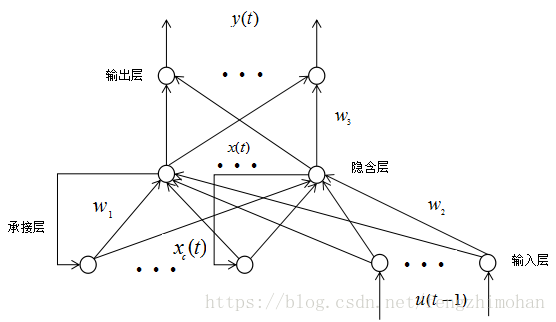

二、基于Matlab实现Elman神经网络

在MATLAB中，Elman神经网络可以通过调用newelm()实现。

显然colab跑不了Matlab，所以这里的代码只是日后复习用

代码结果

In [ ]:
%输入数据  
P=[3.2 3.2 3 3.2 3.2 3.4 3.2 3 3.2 3.2;
9.6 10.3 9 10.3 10.1 10 9.6 9 9.6 9.2;
3.45 3.75 3.5 3.65 3.5 3.4 3.55 3.5 3.55 3.5;
2.15 2.2 2.2 2.2 2 2.15 2.14 2.1 2.1 2.1;
140 120 140 150 80 130 130 100 130 140;
2.8 3.4 3.5 2.8 1.5 3.2 3.5 1.8 3.5 2.5;
11 10.9 11.4 10.8 11.3 11.5 11.8 11.3 11.8 11;
50 70 50 80 50 60 65 40 65 50 ];  %训练数据
T=[2.24 2.33 2.24 2.32 2.2 2.27 2.2 2.26 2.2 2.24];%训练输出实际值
TestInput=[3.2 3.9 3.1 3.2 3.0;
9.5 9 9.5 9.7 9.3;
3.4 3.1 3.6 3.45 3.3;
2.15 2 2.1 2.15 2.05;
115 80 90 130 100;
2.8 2.2 2.7 2.6 2.8;
11.9 13 11.1 10.85 11.2;
50 50 70 70 50];%测试数据
TestOutput=[2.24 2.2 2.2 2.35 2.2]; %测试输出实际值

[pn,minp,maxp,tn,mint,maxt]=premnmx(P,T);
p2= tramnmx(TestInput,minp,maxp);
%创建Elman神经网络  
net_1 = newelm(minmax(pn),[8,1],{'tansig','purelin'},'traingdm');  
  
%设置训练参数  
net_1.trainParam.show = 50;  
net_1.trainParam.lr = 0.01;  
net_1.trainParam.mc = 0.9;  
net_1.trainParam.epochs =10000;  
net_1.trainParam.goal = 1e-3;  
net=init(net_1);%初始化网络  
%训练网络  
net = train(net,pn,tn);  
%使用训练好的网络，自定义输入  
PN = sim(net,p2); 
TestResult= postmnmx(PN,mint,maxt);%仿真值反归一化
%理想输出与训练输出的结果进行比较  
E =TestOutput - TestResult 
%计算误差  
MSE=mse(E);%计算均方误差  
figure(1)
plot(TestOutput,'bo-');
hold on;
plot(TestResult,'r*--');
legend('真实值','预测值');
save('Elman.mat','net');


运行结果





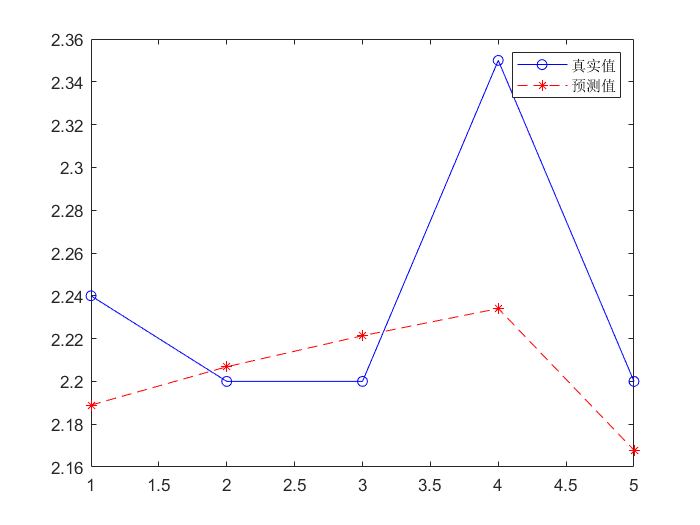

误差结果（真实值-预测值）E =

    0.0511   -0.0068   -0.0214    0.1160    0.0321
平均误差：
    0.0342

    
总的结果，emmmmm。。。还行吧。反正我也没对比其他的网络。
